### Rule Based Classification

In this project, I will calculate the potential revenue return of the client to the firm by using a rule-based classification.

### Business Problem:

A company that sells souvenirs wants to create new level-based customer definitions (personas) using some of its customers' features, create segments according to these new customer definitions. They want to estimate how much new customers can benefit the company on average using the new segments. 

for example, how much can the firm make benefits from 25 years old man who uses online transactions.

### Dataset

The data set includes the prices of the products that an American gift company sells online and in-store and some demographic information of the users who buy these products.

PRICE - product price

SOURCE – online or store

SEX – customer's gender

STATE – USA states in which are the company has the customers 

AGE – Age of customers.

### Purpose of Project

* LEVEL BASED PERSONA DEFINITION: To be able to define new customers according to category levels (Level).

* SIMPLE SEGMENTATION: Simply segment new customer definitions 

* RULE-BASED CLASSIFICATION: When a new customer arrives, classify this customer according to segments.

In [1]:
# Import libraries
import pandas as pd 

* Let's include the dataset and examine it.

In [2]:
df_ = pd.read_csv("souvenir.csv")
df = df_.copy()
df.head()

,price,source,sex,state,age
0,139,store,male,CA,17
1,139,store,male,CA,17
2,149,store,male,CA,17
3,129,store,male,HI,17
4,149,store,male,HI,17


In [3]:
# Let's examine the general structural features
print("##################### Index #####################")
print(df.index)
print("##################### Shape #####################")
print(df.shape)
print("##################### Types #####################")
print(df.dtypes)
print("##################### NA #####################")
print(df.isnull().sum())
print("##################### Total NA #####################")
print(df.isnull().sum().sum())
print("##################### Describe #####################")
print(df.describe().T)

##################### Index #####################
RangeIndex(start=0, stop=5000, step=1)
##################### Shape #####################
(5000, 5)
##################### Types #####################
price      int64
source    object
sex       object
state     object
age        int64
dtype: object
##################### NA #####################
price     0
source    0
sex       0
state     0
age       0
dtype: int64
##################### Total NA #####################
0
##################### Describe #####################
        count      mean        std    min    25%    50%    75%    max
price  5000.0  134.1320  12.464897  109.0  129.0  139.0  139.0  159.0
age    5000.0   23.5814   8.995908   15.0   17.0   21.0   27.0   66.0


- As you can see above our dataset contains 5000 observation units, 5 variables which including continuous and categorical, no NA values.Let's look at the description section, as you can see our general customers seems young so we can make ads according to young people's interests or you can try to acquire older customers.

In [4]:
# How much was earned in total from sales by states?

df.groupby("state").agg({"price": "sum"})

,price
state,
AL,276725
CA,200954
FL,60985
HI,60789
IA,40477
WA,30730


In [5]:
# What are the sales numbers according to SOURCE types?
df["source"].value_counts()

store     2974
online    2026
Name: source, dtype: int64

In [8]:
# What are the price averages in the state-source breakdown?
df.pivot_table(values="price", index="source", columns="state")

state,AL,CA,FL,HI,IA,WA
source,,,,,,
online,134.371703,134.222222,134.268817,133.272727,132.776224,133.951456
store,133.760357,134.387029,133.869888,136.229437,134.312500,133.330709


In [9]:
# What are the total gains broken down by STATE, SOURCE, SEX, AGE?
agg_df = df.groupby(by=["state", 'source', "sex", "age"]).agg({"price": "mean"}).sort_values("price", ascending=False)
agg_df.head()

price
state source sex    age       
CA    store  male   46   159.0
IA    store  female 24   159.0
AL    store  male   36   159.0
      online male   32   154.0
FL    store  female 51   149.0

In [10]:
# After the group by selection, the "state", 'source', "sex", "age" variable turn to the index. we have to make them a variable
agg_df = agg_df.reset_index()
agg_df.head()

,state,source,sex,age,price
0,CA,store,male,46,159.0
1,IA,store,female,24,159.0
2,AL,store,male,36,159.0
3,AL,online,male,32,154.0
4,FL,store,female,51,149.0


In [11]:
# we are going to turn the age variable into the categorical variable and make a new variable called cat_age.
# We will split the variable age using the cut() function and set its the range for cat_age.
# for example: '0_18', '19_23', '24_30', '31_40', '41_70
bins = [0, 18, 23, 30, 40, agg_df["age"].max()]
mylabels = ['0_18', '19_23', '24_30', '31_40', '41_' + str(agg_df["age"].max())] # determining the cat_age intervals
#splitting the age
agg_df["cat_age"] = pd.cut(agg_df["age"], bins, labels=mylabels)
agg_df.head()
agg_df.tail()

,state,source,sex,age,price,cat_age
343,CA,online,male,47,119.0,41_66
344,IA,store,male,18,119.0,0_18
345,AL,online,female,38,119.0,31_40
346,HI,online,male,47,119.0,41_66
347,FL,store,male,26,109.0,24_30


* Let's create level based customer (persona)  and add it in the data set as a new variable called " customers_level_based"

In [12]:
cols = [i for i in agg_df.columns if i not in ["price", "age"]] #choosing the new persona's criteria from the columns

agg_df["customers_level_based"] = ["_".join(i) for i in agg_df[cols].values] 
agg_df.head()

,state,source,sex,age,price,cat_age,customers_level_based
0,CA,store,male,46,159.0,41_66,CA_store_male_41_66
1,IA,store,female,24,159.0,24_30,IA_store_female_24_30
2,AL,store,male,36,159.0,31_40,AL_store_male_31_40
3,AL,online,male,32,154.0,31_40,AL_online_male_31_40
4,FL,store,female,51,149.0,41_66,FL_store_female_41_66


In [13]:
# I only get the columns that will work for me
agg_df = agg_df[["customers_level_based", "price"]]
agg_df.head() 

,customers_level_based,price
0,CA_store_male_41_66,159.0
1,IA_store_female_24_30,159.0
2,AL_store_male_31_40,159.0
3,AL_online_male_31_40,154.0
4,FL_store_female_41_66,149.0


In [14]:
agg_df["customers_level_based"].value_counts() #As you can see the customer_level_based variable is multiplexed.

AL_store_male_41_66       7
CA_store_male_24_30       7
CA_store_female_24_30     7
AL_online_female_24_30    7
AL_store_male_24_30       7
                         ..
IA_store_male_24_30       1
HI_online_male_24_30      1
WA_store_male_0_18        1
WA_store_male_41_66       1
FL_online_male_41_66      1
Name: customers_level_based, Length: 109, dtype: int64

In [15]:
#I'm unifying the multiplexed column using groupby
agg_df = agg_df.groupby("customers_level_based").agg({"price": "mean"}).reset_index()
agg_df["customers_level_based"].value_counts()

FL_online_female_31_40    1
HI_online_male_31_40      1
CA_online_female_0_18     1
AL_store_male_41_66       1
WA_store_male_24_30       1
                         ..
AL_store_male_24_30       1
WA_store_female_19_23     1
FL_store_male_0_18        1
FL_online_male_41_66      1
HI_online_male_0_18       1
Name: customers_level_based, Length: 109, dtype: int64

* Using the pd.qcut function we will segment new personas by price into "D", "C", "B", "A".

In [16]:
agg_df["segment"] = pd.qcut(agg_df["price"], 4, labels=["D", "C", "B", "A"])

In [17]:
agg_df.head()

,customers_level_based,price,segment
0,AL_online_female_0_18,134.182411,B
1,AL_online_female_19_23,135.379048,B
2,AL_online_female_24_30,132.845238,C
3,AL_online_female_31_40,128.513889,D
4,AL_online_female_41_66,134.103727,B


In [18]:
agg_df.groupby("segment").agg({"price": "mean"}) #analysis of segment by price

,price
segment,
D,129.206780
C,133.509674
B,134.999645
A,138.691234


In [19]:
#analysis of segments
print("number of elements of segments:\n", agg_df["segment"].value_counts())

print("total price mean: ", agg_df["price"].mean(), "\n")

print(agg_df.groupby("segment").agg({"price": ["min", "mean", "max"]}))

import seaborn as sns



number of elements of segments:
 D    28
C    27
B    27
A    27
Name: segment, dtype: int64
total price mean:  134.05692459052992 

              price                        
                min        mean         max
segment                                    
D        119.000000  129.206780  132.333333
C        132.500000  133.509674  134.077340
B        134.103727  134.999645  136.000000
A        136.060606  138.691234  145.428571


############################################


* What segment does a 33-year-old California female online shopper belong to and how much income is the company expected to generate on average?

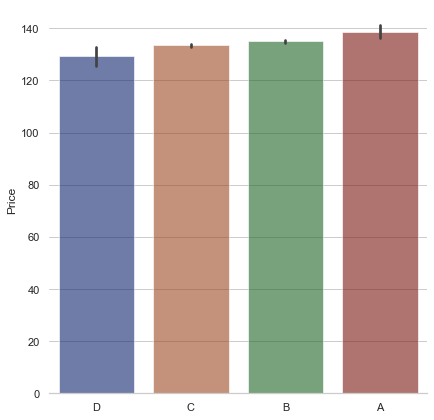

In [31]:
sns.set_theme(style="whitegrid")


# Draw a nested barplot by species and sex
g = sns.catplot(
    data=agg_df, kind="bar",
    x="segment", y="price", ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Price");


In [20]:
#California, online female 33 years old;
new_user = "CA_online_female_31_40"
agg_df[agg_df["customers_level_based"] == new_user]

,customers_level_based,price,segment
23,CA_online_female_31_40,129.875902,D


* What segment does a 45-year-old California male store shopper belong to and how much income is the company expected to generate on average?

In [21]:
new_user2 = "CA_store_male_41_66"
agg_df[agg_df["customers_level_based"] == new_user2]

,customers_level_based,price,segment
39,CA_store_male_41_66,140.041667,A
